In [1]:
#import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import dataset
ds=pd.read_csv('hr_data.csv')

In [4]:
#encode yes/no in target variable
mapping_dict = {'Attrition':{'Yes':1,'No':0}}
ds.replace(mapping_dict,inplace=True)

In [5]:
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
#drop irrelelvant columns
ds.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

In [7]:
#check nature of dataset
ds.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


 numerical columns have pretty close values of 75% and max
 so no outliers seem to be present in the dataset
 do get further insight lets plot the data

In [8]:
#divide attrition in yes and no
yes_attrition=ds[(ds['Attrition'] == 1)]
no_attrition=ds[(ds['Attrition'] == 0)]
print(len(yes_attrition),len(no_attrition))

237 1233


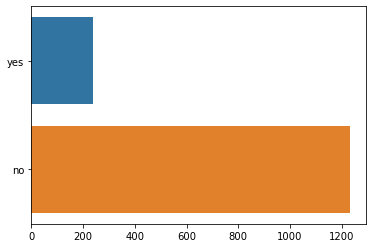

In [9]:
sns.barplot(x=(len(yes_attrition),len(no_attrition)),y=['yes','no'])

plot above shows the number of yes_attrition and no_attrition
this will help us get idea of how each parameter will relate to target

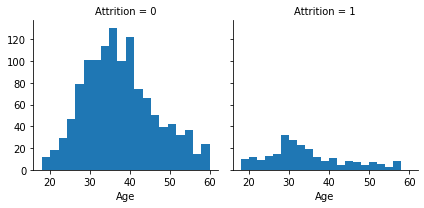

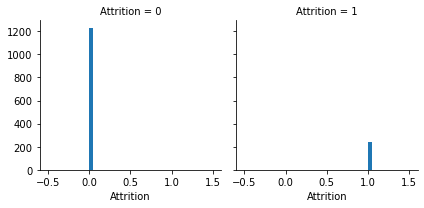

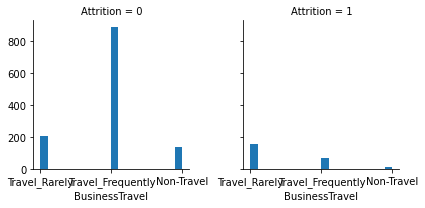

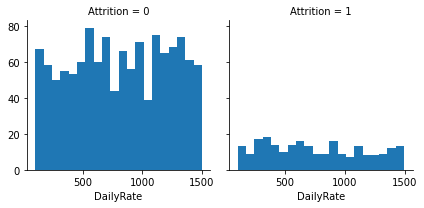

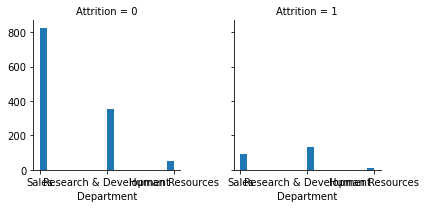

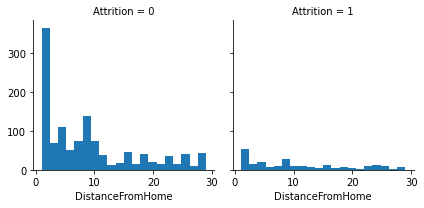

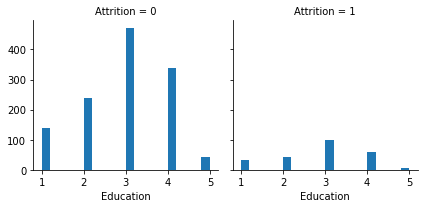

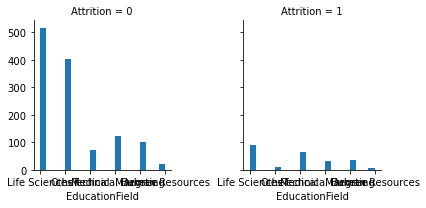

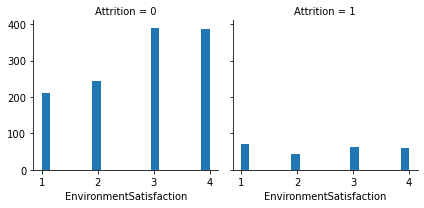

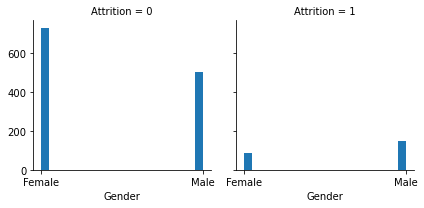

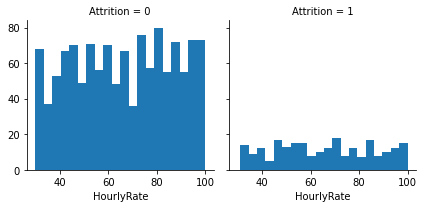

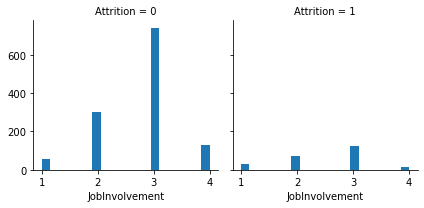

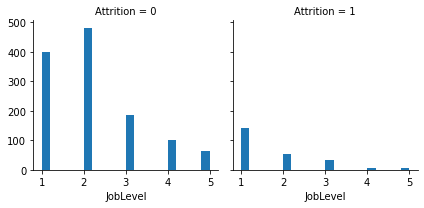

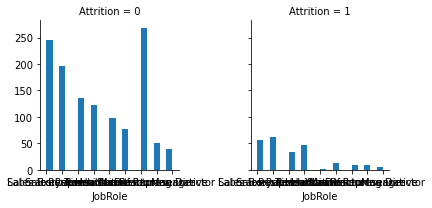

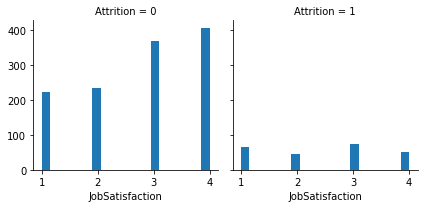

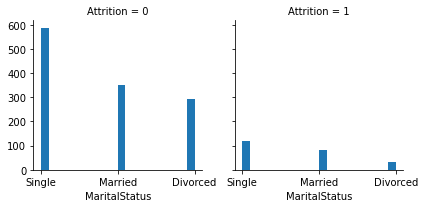

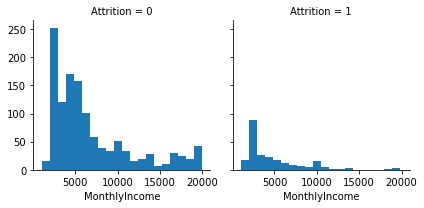

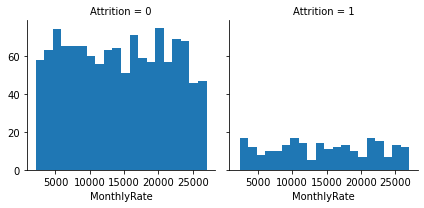

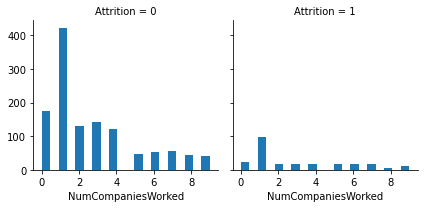

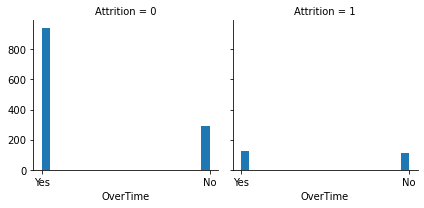

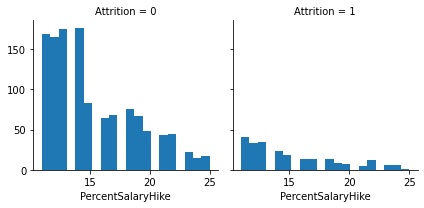

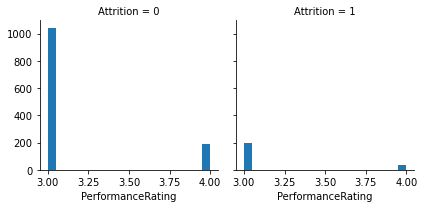

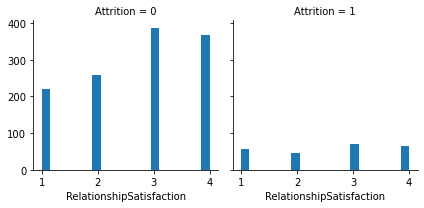

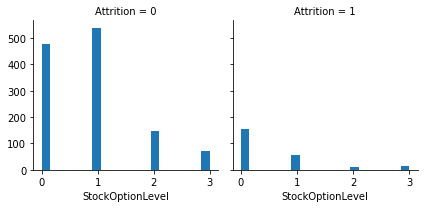

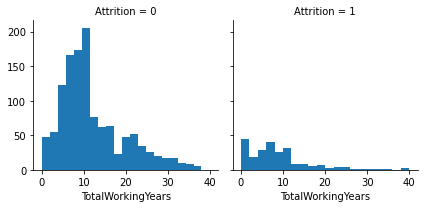

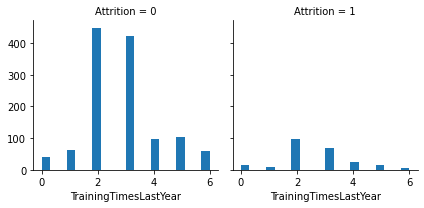

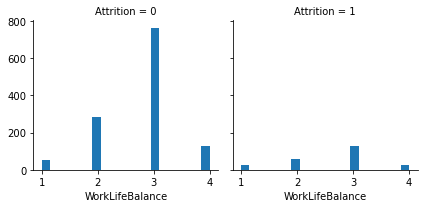

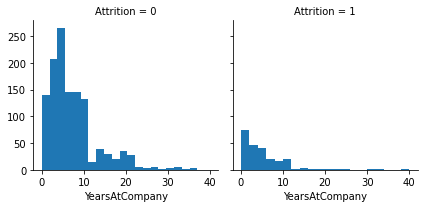

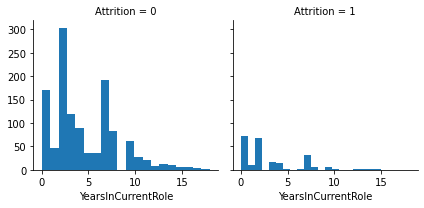

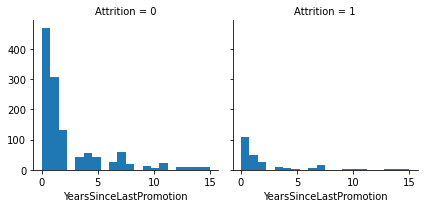

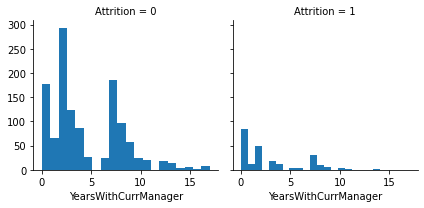

In [10]:
#plot distribution of each parameter with respect to attrition
for i in ds.columns:
    g = sns.FacetGrid(ds, col='Attrition')
    g.map(plt.hist, i, bins=20)

from above plots we can see that for all teh columns no_attrition is greater
attrition is high in people who travel rarely,
attrition is high in people in research and development,
also attrition can be seen high in education field of life sciences
attrition is hing with males
if joblevel is 1 maybe the lowest attrition is high
single people tend to have positive attrition
people tend to have positive attrition if overtime is present
lower rating tends to positive attrition

In [11]:
#check correlation with target variable
corr_ds=pd.DataFrame(ds.corr())
corr_ds['Attrition']

Age                        -0.159205
Attrition                   1.000000
DailyRate                  -0.056652
DistanceFromHome            0.077924
Education                  -0.031373
EnvironmentSatisfaction    -0.103369
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobSatisfaction            -0.103481
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
YearsAtCompany             -0.134392
YearsInCurrentRole         -0.160545
YearsSinceLastPromotion    -0.033019
YearsWithCurrManager       -0.156199
Name: Attrition, dtype: float64

see least correlated column PerformanceRating,MonthlyRate,DailyRate,DistanceFromHome,HourlyRate,NumCompaniesWorked
as this column are not much related to target implies target does not change much wrt to these parametrs hence dropping

In [12]:
ds.drop(['PerformanceRating','MonthlyRate','DailyRate','DistanceFromHome','HourlyRate','NumCompaniesWorked'],axis=1,inplace=True)
ds.head()

,Age,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,2,Life Sciences,2,Female,3,2,...,11,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,1,Life Sciences,3,Male,2,2,...,23,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,...,15,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,4,Life Sciences,4,Female,3,1,...,11,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,1,Medical,1,Male,3,1,...,12,4,1,6,3,3,2,2,2,2


In [13]:
categorical_var = ['Gender','BusinessTravel','Department','EducationField','MaritalStatus','OverTime','JobRole']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  
for i  in categorical_var:
    ds[i]=le.fit_transform(ds[i])
ds.head()

,Age,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,2,1,2,0,3,2,...,11,1,0,8,0,1,6,4,0,5
1,49,0,1,1,1,1,3,1,2,2,...,23,4,1,10,3,3,10,7,1,7
2,37,1,2,1,2,4,4,1,2,1,...,15,2,0,7,3,3,0,0,0,0
3,33,0,1,1,4,1,4,0,3,1,...,11,3,0,8,3,3,8,7,3,0
4,27,0,2,1,1,3,1,1,3,1,...,12,4,1,6,3,3,2,2,2,2


In [14]:
ds.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int32
Department                  int32
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
OverTime                    int32
PercentSalaryHike           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [15]:
#scaling the numerical variables
from sklearn.preprocessing import StandardScaler
numerical_col=['Age','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany']
sc = StandardScaler()
scale = sc.fit_transform(ds[numerical_col])
scale = pd.DataFrame(scale,columns=numerical_col)

In [16]:
#inserting scaled numerical variables back to ds
ds_original=ds
ds=ds.drop(columns=numerical_col,axis=1)
ds=ds.merge(scale,left_index=True,right_index=True,how='left')
ds.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany
0,1,2,2,2,1,2,0,3,2,7,...,0,1,4,0,5,0.446350,-0.108350,-1.150554,-0.421642,-0.164613
1,0,1,1,1,1,3,1,2,2,6,...,3,3,7,1,7,1.322365,-0.291719,2.129306,-0.164511,0.488508
2,1,2,1,2,4,4,1,2,1,2,...,3,3,0,0,0,0.008343,-0.937654,-0.057267,-0.550208,-1.144294
3,0,1,1,4,1,4,0,3,1,6,...,3,3,7,3,0,-0.429664,-0.763634,-1.150554,-0.421642,0.161947
4,0,2,1,1,3,1,1,3,1,2,...,3,3,2,2,2,-1.086676,-0.644858,-0.877232,-0.678774,-0.817734


In [17]:
#as target variable have only 2 values, yes or no we will try the logistic regression approach
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [18]:
#Divide data in dependent and independent variables
x=ds.iloc[:,1:]
y=ds['Attrition']
print(x.shape,y.shape)
#divide data in train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22,random_state=43)

(1470, 24) (1470,)


In [19]:
#training model and fitting the train data
#predicting on test data further and checking the metrics
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred),classification_report(y_test,pred))
#lets keep this model untouched

0.8487654320987654
[[255   5]
 [ 44  20]]               precision    recall  f1-score   support

           0       0.85      0.98      0.91       260
           1       0.80      0.31      0.45        64

    accuracy                           0.85       324
   macro avg       0.83      0.65      0.68       324
weighted avg       0.84      0.85      0.82       324



In [21]:
y1=y
x1=x

In [22]:
print(y1.shape)
print(x1.shape)

(1470,)
(1470, 24)


In [23]:
#check for best random state for max accuracy
max_acc = 0
random_state=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .22,random_state=i)
    lg.fit(x1_train,y1_train)
    pred = lg.predict(x1_test)
    x=accuracy_score(y1_test,pred)
    if x>max_acc:
        max_acc = x
        random_state=i

In [24]:
print(max_acc,
random_state)

0.8919753086419753 55


In [25]:
#logistic regression model for best accuracy
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .22,random_state=55)
lg.fit(x1_train,y1_train)
y_pred = lg.predict(x1_test)
print(accuracy_score(y1_test,y_pred))

0.8919753086419753


In [26]:
print(confusion_matrix(y1_test,y_pred),classification_report(y1_test,y_pred))

[[273  10]
 [ 25  16]]               precision    recall  f1-score   support

           0       0.92      0.96      0.94       283
           1       0.62      0.39      0.48        41

    accuracy                           0.89       324
   macro avg       0.77      0.68      0.71       324
weighted avg       0.88      0.89      0.88       324



In [27]:
#fnalize the logistic regression model
import joblib
joblib.dump(lg,'hr_data.pkl')

['hr_data.pkl']

In [28]:
#check if we get more accuracy with SVC and do hyperparameter tuning using grid search cv
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear','rbf'),'C':[0.01,0.1,1,10,100]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x1_train,y1_train)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.8568786785646477
linear
{'C': 100, 'kernel': 'linear'}


In [29]:
#finalize model with the parameters returened by grib search cv and check metrics for same
svc=svm.SVC(kernel='linear',C=100)
svc.fit(x1_train,y1_train)
svc_pred = svc.predict(x1_test)
print(accuracy_score(y1_test,svc_pred))
print(confusion_matrix(y1_test,svc_pred),classification_report(y1_test,svc_pred))

0.8950617283950617
[[277   6]
 [ 28  13]]               precision    recall  f1-score   support

           0       0.91      0.98      0.94       283
           1       0.68      0.32      0.43        41

    accuracy                           0.90       324
   macro avg       0.80      0.65      0.69       324
weighted avg       0.88      0.90      0.88       324



In [30]:
#finalize and save the model
import joblib
joblib.dump(svc,'hr_data_svc.pkl')

['hr_data_svc.pkl']